In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.distributions.empirical_distribution import ECDF
from numpy import random

### PAL per child

In [3]:
fitbit_new = pd.read_csv('../data/Fitbit_Imputation_FINAL.csv', sep=';', header=0)
steps_mean_wave_new = fitbit_new.groupby(['Child', 'Wave']).mean()['Steps'].reset_index()
steps_mean_wave_new.Steps = steps_mean_wave_new.Steps * 0.000153
steps_mean_wave_new = steps_mean_wave_new.pivot(index='Child', columns='Wave')['Steps']

In [4]:
steps_mean_wave_new.describe()

Wave,1,2,3,4,5,6,7
count,926.000000,928.000000,927.000000,929.000000,1028.000000,782.000000,782.000000
mean,1.402477,1.534053,1.590081,1.436387,1.337196,1.610850,1.444116
std,0.525666,0.584990,0.600745,0.566656,0.529620,0.652722,0.602641
min,0.188904,0.153000,0.153000,0.153000,0.153000,0.200481,0.153000
25%,1.029907,1.119218,1.194089,1.030429,0.973689,1.167224,1.036403
50%,1.358293,1.498252,1.512762,1.395054,1.286317,1.544003,1.405549
75%,1.691782,1.915246,1.928030,1.783266,1.685230,1.999175,1.808830
max,3.436686,4.013129,4.065149,3.432912,3.606312,3.947655,4.026578


In [81]:
steps_wave1 = steps_mean_wave_new[1]
PAL_wave1 = steps_wave1.dropna()
PAL_wave1

Child
902     1.614558
904     1.414852
907     0.598307
908     1.782195
909     1.534988
          ...   
4886    1.681215
4887    2.513535
4888    1.642353
4889    2.356557
4890    1.612722
Name: 1, Length: 926, dtype: float64

### frequency distribution

(array([ 4.,  2.,  2.,  5.,  9., 15., 14., 15., 17., 25., 34., 40., 54.,
        53., 38., 47., 38., 51., 64., 38., 40., 40., 44., 21., 26., 28.,
        27., 19., 20., 14., 20.,  5., 10.,  5.,  6.,  8.,  4.,  3.,  5.,
         1.,  2.,  2.,  2.,  1.,  3.,  0.,  2.,  1.,  0.,  2.]),
 array([0.188904  , 0.25385964, 0.31881528, 0.38377092, 0.44872656,
        0.5136822 , 0.57863784, 0.64359348, 0.70854912, 0.77350476,
        0.8384604 , 0.90341604, 0.96837168, 1.03332732, 1.09828296,
        1.1632386 , 1.22819424, 1.29314988, 1.35810552, 1.42306116,
        1.4880168 , 1.55297244, 1.61792808, 1.68288372, 1.74783936,
        1.812795  , 1.87775064, 1.94270628, 2.00766192, 2.07261756,
        2.1375732 , 2.20252884, 2.26748448, 2.33244012, 2.39739576,
        2.4623514 , 2.52730704, 2.59226268, 2.65721832, 2.72217396,
        2.7871296 , 2.85208524, 2.91704088, 2.98199652, 3.04695216,
        3.1119078 , 3.17686344, 3.24181908, 3.30677472, 3.37173036,
        3.436686  ]),
 <BarContainer

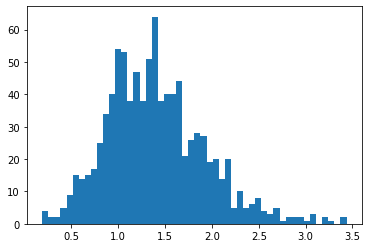

In [6]:
pyplot.hist(PAL_wave1, bins=50)

### Cumulative distribution function

[0.18890400000000002,
 0.19619699999999998,
 0.225063,
 0.22598100000000002,
 0.274839,
 0.309213,
 0.36077400000000004,
 0.372861,
 0.398463,
 0.417537,
 0.424728,
 0.442017,
 0.445944,
 0.44910600000000006,
 0.452727,
 0.4534155,
 0.458388,
 0.461091,
 0.468588,
 0.484041,
 0.494751,
 0.49859640000000005,
 0.516375,
 0.525402,
 0.5281560000000001,
 0.5333274,
 0.535653,
 0.538407,
 0.541467,
 0.54621,
 0.5505450000000001,
 0.556257,
 0.5574708,
 0.557991,
 0.564111,
 0.566559,
 0.571302,
 0.5983065000000001,
 0.600168,
 0.600423,
 0.60285825,
 0.607665,
 0.6078078,
 0.611031,
 0.617253,
 0.618222,
 0.623067,
 0.6308699999999999,
 0.632502,
 0.634287,
 0.643314,
 0.6446910000000001,
 0.646578,
 0.6552378000000001,
 0.6555540000000001,
 0.656268,
 0.6619800000000001,
 0.6629999999999999,
 0.6692832,
 0.6820128000000001,
 0.6862050000000001,
 0.6872250000000001,
 0.6891120000000001,
 0.6936,
 0.698598,
 0.700638,
 0.712113,
 0.719151,
 0.72204525,
 0.7228740000000001,
 0.725322,
 0.7263

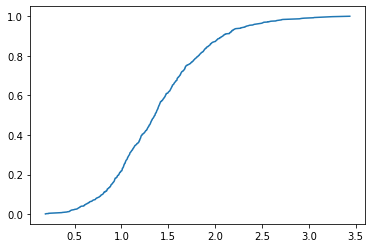

In [94]:
ecdf = ECDF(PAL_wave1)

pyplot.plot(ecdf.x, ecdf.y)

ecdf.x = list(ecdf.x)
del ecdf.x[0]
ecdf.x

###  Inverse sampling from ecdf

In [99]:
random.seed(1234)

sampled_pal = []

for i in range(1, 101):
    r = random.random_sample(408)
    pal = np.quantile(PAL_wave1, q=r)
    sampled_pal.append(pal)

df1 = pd.DataFrame(sampled_pal).T
df1.mean(axis=0)

0     1.439175
1     1.390720
2     1.383082
3     1.365187
4     1.396561
        ...   
95    1.391743
96    1.368664
97    1.418119
98    1.437492
99    1.402752
Length: 100, dtype: float64

### writing to file

In [96]:
PAL_wave1

Child
902     1.614558
904     1.414852
907     0.598307
908     1.782195
909     1.534988
          ...   
4886    1.681215
4887    2.513535
4888    1.642353
4889    2.356557
4890    1.612722
Name: 1, Length: 926, dtype: float64